<a href="https://colab.research.google.com/github/haunt99/opencv-research/blob/main/DetectShapeInAnImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

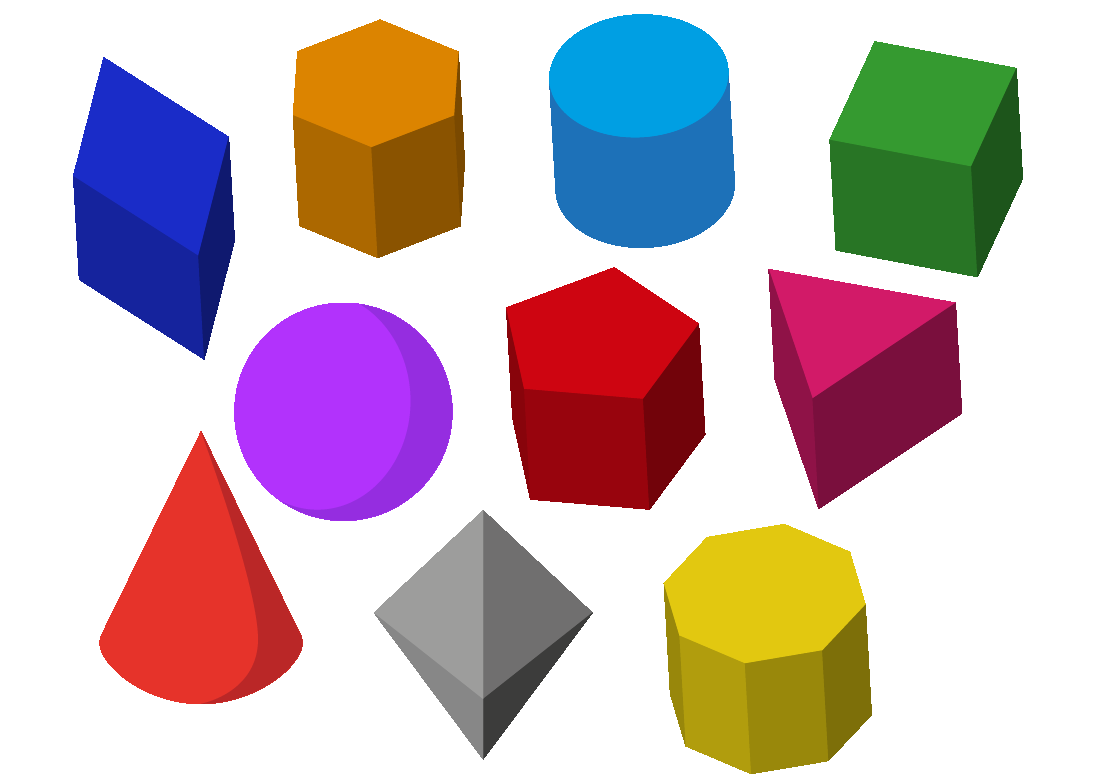

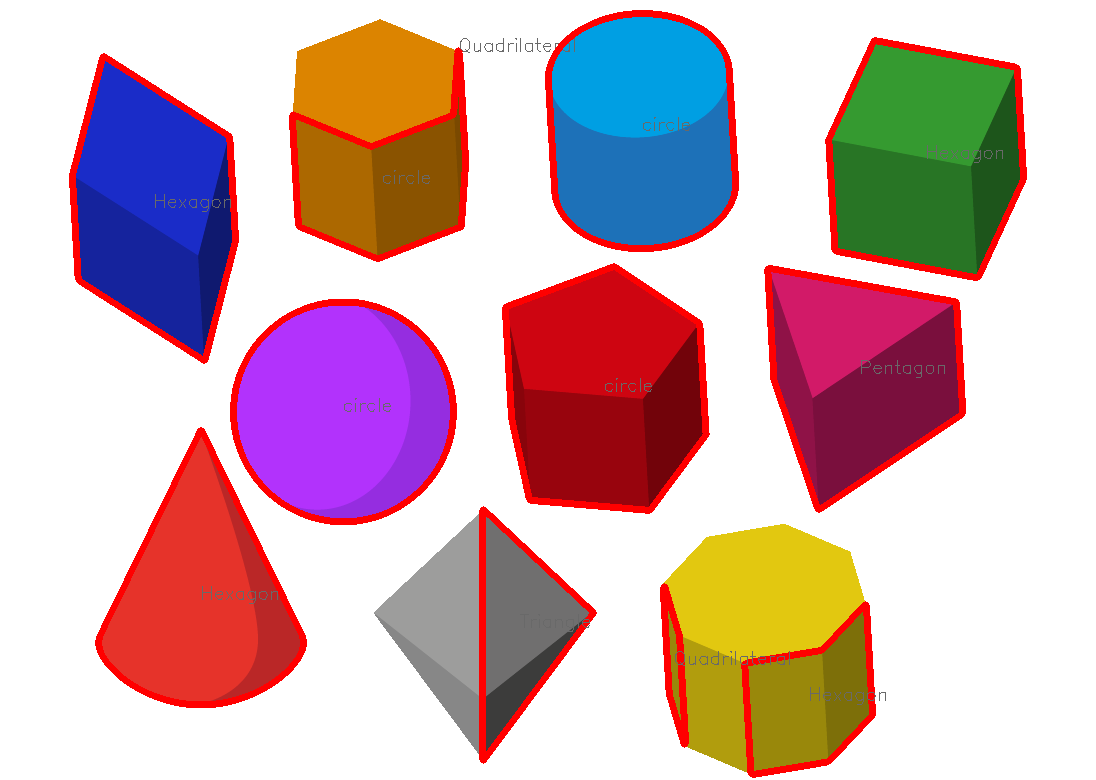

In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/image.png')
cv2_imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
i = 0
for contour in contours:
    if i == 0:
        i = 1
        continue
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (105, 105, 105), 1)
    elif len(approx) == 4:
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (105, 105, 105), 1)
    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (105, 105, 105), 1)
    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (105, 105, 105), 1)
    else:
        cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (105, 105, 105), 1)
cv2_imshow(img)

